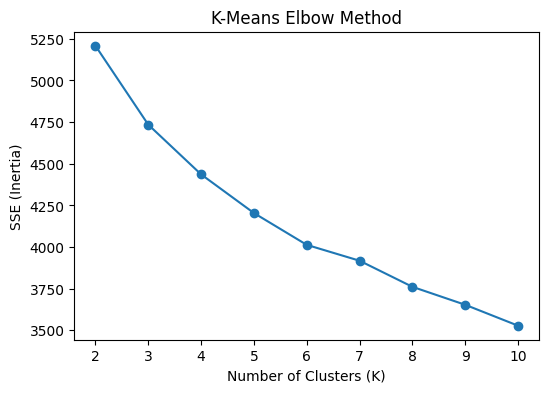

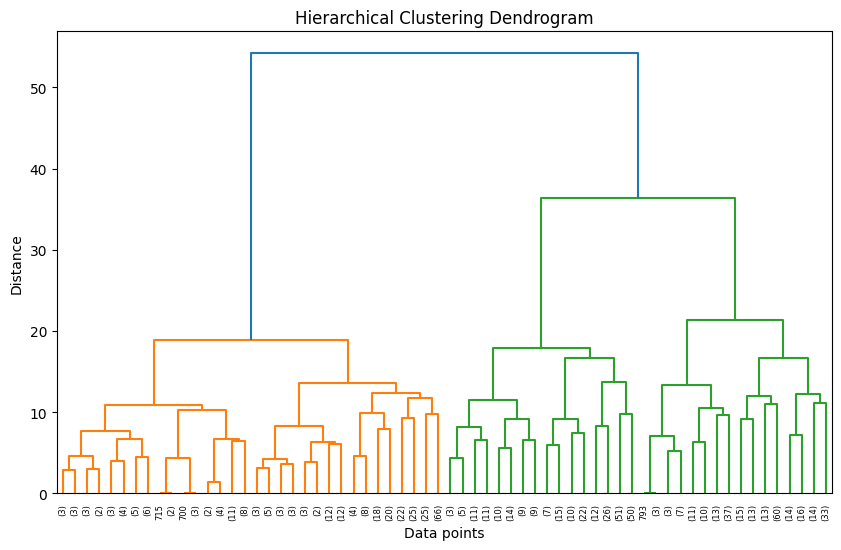


Clustering Comparison with Actual Labels:
K-Means: ARI=0.181, NMI=0.167
Hierarchical: ARI=0.161, NMI=0.145


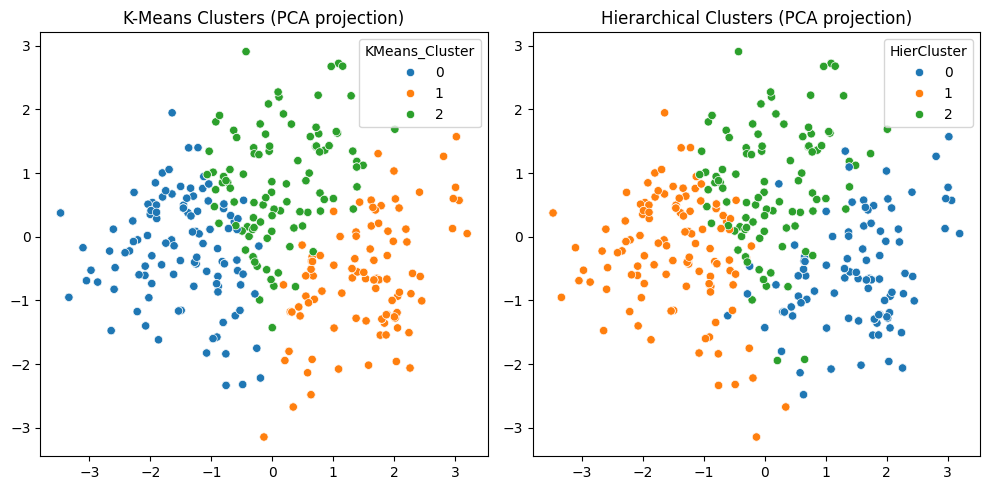

In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# We'll use the reduced dataset
x_train_reduced = 'E:/Heart_Disease_Project/data/x_train_reduced.csv'
y_train = 'E:/Heart_Disease_Project/data/y_train.csv'

x_train_reduced = pd.read_csv(x_train_reduced)
y_train = pd.read_csv(y_train)
y_train = y_train.values.ravel()

X = x_train_reduced  

# K-Means Clustering
# Elbow method to find optimal K
sse = []
K_range = range(2, 11) 
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, sse, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE (Inertia)")
plt.title("K-Means Elbow Method")
plt.show()

# Train KMeans with optimal K
optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
X['KMeans_Cluster'] = kmeans.fit_predict(X)

# Hierarchical Clustering
plt.figure(figsize=(10,6))
Z = linkage(X, method='ward')
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

# Train Hierarchical Clustering model
hc = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
X['HierCluster'] = hc.fit_predict(X)

# Compare with Actual Labels
# Adjusted Rand Index (ARI) & Normalized Mutual Information (NMI)
ari_kmeans = adjusted_rand_score(y_train, X['KMeans_Cluster'])
nmi_kmeans = normalized_mutual_info_score(y_train, X['KMeans_Cluster'])

ari_hc = adjusted_rand_score(y_train, X['HierCluster'])
nmi_hc = normalized_mutual_info_score(y_train, X['HierCluster'])

print("\nClustering Comparison with Actual Labels:")
print(f"K-Means: ARI={ari_kmeans:.3f}, NMI={nmi_kmeans:.3f}")
print(f"Hierarchical: ARI={ari_hc:.3f}, NMI={nmi_hc:.3f}")

# Visualization of Clusters
# Use first 2 PCA components for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop(columns=['KMeans_Cluster','HierCluster']))

plt.figure(figsize=(10,5))

# KMeans clusters
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=X['KMeans_Cluster'], palette="tab10")
plt.title("K-Means Clusters (PCA projection)")

# Hierarchical clusters
plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=X['HierCluster'], palette="tab10")
plt.title("Hierarchical Clusters (PCA projection)")

plt.tight_layout()
plt.show()
